<a href="https://colab.research.google.com/github/Eduardo-Nogueira-Tech/Aulas_Introdu-o-a-regress-o-linear-Simples/blob/main/Aula_Regress%C3%A3o__Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importação da biblioteca:





In [15]:
import pandas as pd
import numpy as np
import seaborn as sns


2. Definição das variáveis dependente (y) e independente (x):

In [4]:
dataset = {"tempo":[1,3,4,4,6,8,10,10,11,13],
           "vendas":[91,110,106,116,119,129,139,143,138,159]}

dataset = pd.DataFrame  (dataset)
dataset.head()



,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


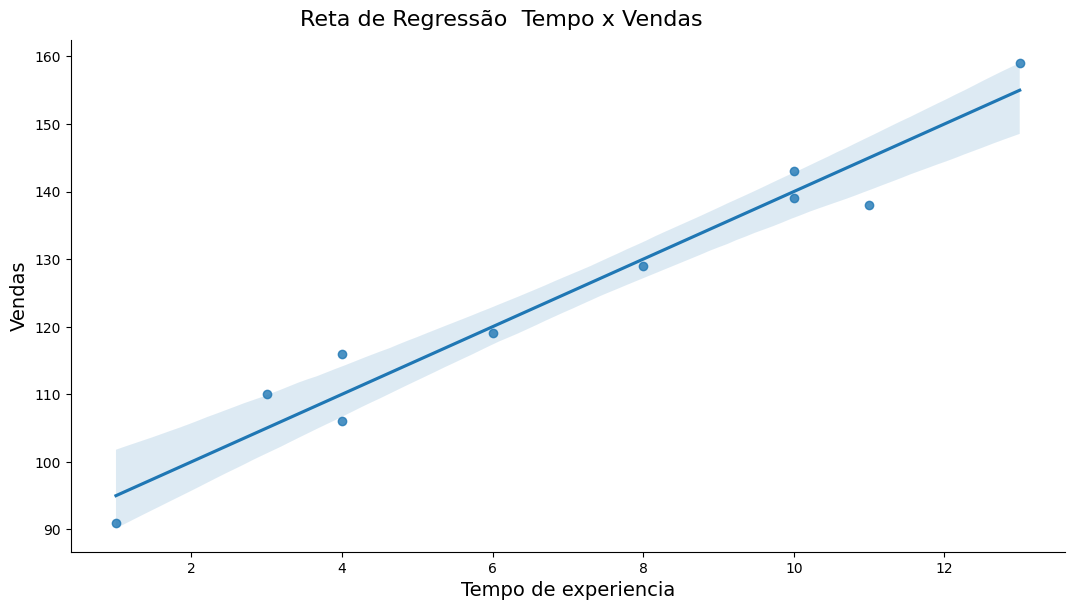

In [12]:
ax = sns.lmplot (x = "tempo", y = "vendas", data = dataset)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de Regressão  Tempo x Vendas", fontsize=16, y=1.02)
ax.set_xlabels("Tempo de experiencia" , fontsize=14)
ax.set_ylabels("Vendas" , fontsize=14)
ax;

In [13]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [29]:
import statsmodels.api as sm

y = dataset.vendas
x = dataset.tempo
x = sm.add_constant(x)


# Criando o modelo de regressão:
'''
OLS: Significa "Ordinary Least Squares" (Mínimos Quadrados Ordinários).
 É o método usado para ajustar o modelo de regressão linear.
y: Variável dependente (resposta).
x: Variável independente (preditores) com a constante adicionada.
model: É a instância do modelo criado, ainda não ajustado aos dados.
'''

model = sm.OLS(y,x)


results = model.fit()


results.summary()



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.22e-06
Time:                        15:45:30   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.000      82.908      97.092
tempo          5.0000      0.387     12.925      0.000       4.108       5.892
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
dataset["Y_previsto"] = results.predict()
dataset.head()

,tempo,vendas,Y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


Quando o data set está errando

In [32]:
# Criar uma coluna para trazer o erro

dataset["erro"] = dataset.vendas - dataset.Y_previsto
dataset.head()

,tempo,vendas,Y_previsto,erro
0,1,91,95.0,-4.0
1,3,110,105.0,5.0
2,4,106,110.0,-4.0
3,4,116,110.0,6.0
4,6,119,120.0,-1.0
